# Master Notebook 
## Lunara Tech - Full Pipeline


This master notebook serves as the central controller for executing the entire data science workflow for Lunara Tech's ADS-508 project: **"Optimizing Workplace Health Policies Through Predictive Analytics."** It sequentially runs all modular notebooks that correspond to key phases of the project, including:

1. **Data Ingestion** – Uploading data to Amazon S3
2. **Data Processing and Analysis** – Performing EDA and analysis
3. **Feature Engineering** – Cleaning, transforming, and preparing datasets
4. **Modeling and Evaluation** – Training and evaluating predictive models

Each phase is encapsulated in a standalone notebook to ensure clarity, modularity, and reusability. This master notebook orchestrates these steps using Jupyter’s `%run` magic command, ensuring that all phases execute in a logical, reproducible order. This approach also avoids variable conflicts and allows for easier debugging and iteration.


### Step 0: Data Ingestion

In [2]:
print(" * Uploading data to s3")
%run ./00_data_upload.ipynb

 * Uploading data to s3
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
Using S3 bucket: usd-team1-ads508
                           PRE .ipynb_checkpoints/
                           PRE ab_data/
                           PRE athena/
                           PRE county_health_rankings/
                           PRE exports/
                           PRE health-policy-feature-store-20250331-073559/
                           PRE health-policy-feature-store-20250331-073943/
                           PRE health-policy-feature-store-20250331-074714/
                           PRE health-policy-feature-store-20250331-080546/
                           PRE health-policy-feature-store-20250331-083045/
                           PRE health-policy-optimization/
                           PRE health-policy-xgboost-20250331-2330

### Step 1: Data Processing and Analysis

 * Running Data Processing and Analysis
Stored 's3_public_path' (str)
Stored 's3_private_path' (str)
Stored 's3_processed_path' (str)
Processing CSV files...
Processing ld_data/adult19.csv (Year: 2019)
Saved processed file to ld_data_processed/adult19.csv
Processing ld_data/adult20.csv (Year: 2020)
Saved processed file to ld_data_processed/adult20.csv
Processing ld_data/adult21.csv (Year: 2021)
Saved processed file to ld_data_processed/adult21.csv
Processing ld_data/adult22.csv (Year: 2022)
Saved processed file to ld_data_processed/adult22.csv
Processing ld_data/adult23.csv (Year: 2023)
Saved processed file to ld_data_processed/adult23.csv
Successfully processed 5 files
CREATE DATABASE IF NOT EXISTS db_508
            database_name
0                  db_508
1                 default
2                  dsoaws
3  sagemaker_featurestore
Database creation successful: True
Stored 'ingest_create_athena_db_passed' (bool)
CREATE EXTERNAL TABLE IF NOT EXISTS db_508.nhis_dataset(
        SRVY_YR

,srvy_yr,evercovd_a,shtcvd191_a,empdysmss3_a,hicov_a,emdindstn1_a,sex_a,agep_a,educp_a,region
0,2019,None,None,NaN,1,None,1,97,7,3
1,2019,None,None,0.0,1,None,2,28,6,3
2,2019,None,None,NaN,1,None,1,72,5,3
3,2019,None,None,0.0,1,None,1,60,7,3
4,2019,None,None,0.0,1,None,1,60,5,3
5,2019,None,None,NaN,1,None,1,78,5,3
6,2019,None,None,0.0,1,None,1,32,8,3
7,2019,None,None,NaN,2,None,1,61,4,3
8,2019,None,None,3.0,1,None,1,28,5,3
9,2019,None,None,NaN,1,None,1,85,1,3


Basic Statistics:


,avg_age,min_age,max_age,avg_days_missed,percent_insured
0,52.928585,18,99,14.34373,93.303155



Distribution of SEX_A:


,SEX_A,count,percentage
0,1,68687,45.724271
1,2,81517,54.265078
2,7,10,0.006657
3,9,6,0.003994



Distribution of EVERCOVD_A:


,EVERCOVD_A,count,percentage
0,1,27289,26.147154
1,2,76307,73.114107
2,7,128,0.122644
3,8,451,0.432129
4,9,192,0.183966



Distribution of SHTCVD191_A:


,SHTCVD191_A,count,percentage
0,1,61998,78.348561
1,2,15554,19.656013
2,7,381,0.481480
3,8,1135,1.434330
4,9,63,0.079615



Distribution of HICOV_A:


,HICOV_A,count,percentage
0,1,140160,93.303155
1,2,9853,6.559047
2,7,101,0.067235
3,9,106,0.070563



Distribution of EMDINDSTN1_A:


,EMDINDSTN1_A,count,percentage
0,1,395,0.712521
1,2,229,0.413082
2,3,52,0.093800
3,4,19,0.034273
4,5,64,0.115446
...,...,...,...
77,78,3111,5.611776
78,79,37,0.066742
79,97,774,1.396179
80,98,186,0.335516



Top 10 most common values for EMDINDSTN1_A:


,EMDINDSTN1_A,count,percentage
0,1,395,0.712521
1,2,229,0.413082
2,3,52,0.093800
3,4,19,0.034273
4,5,64,0.115446
5,6,39,0.070350
6,7,61,0.110035
7,8,129,0.232697
8,9,480,0.865848
9,10,3637,6.560600



Distribution of EDUCP_A:


,EDUCP_A,count,percentage
0,0,152,0.101185
1,1,10351,6.890561
2,2,2340,1.557715
3,3,3412,2.271335
4,4,34023,22.648782
5,5,23091,15.371455
6,6,5830,3.880975
7,7,13603,9.055385
8,8,34425,22.916389
9,9,16548,11.015843



Top 10 most common values for EDUCP_A:


,EDUCP_A,count,percentage
0,0,152,0.101185
1,1,10351,6.890561
2,2,2340,1.557715
3,3,3412,2.271335
4,4,34023,22.648782
5,5,23091,15.371455
6,6,5830,3.880975
7,7,13603,9.055385
8,8,34425,22.916389
9,9,16548,11.015843



Distribution of REGION:


,REGION,count,percentage
0,1,25024,16.658235
1,2,33108,22.039675
2,3,54440,36.240181
3,4,37648,25.061909


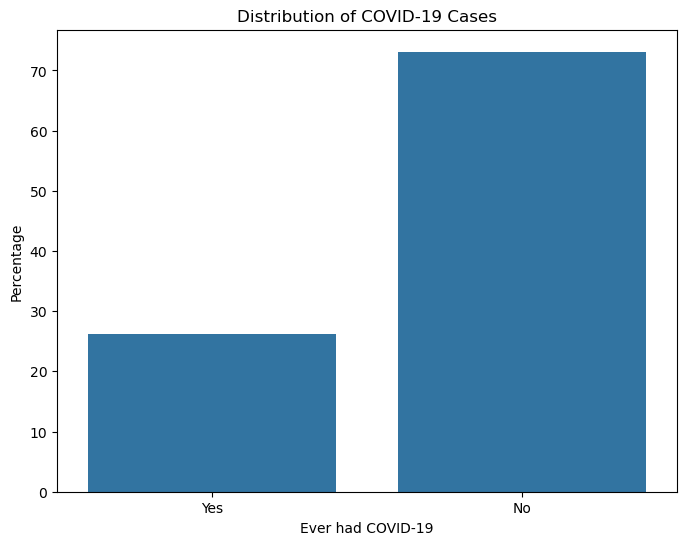

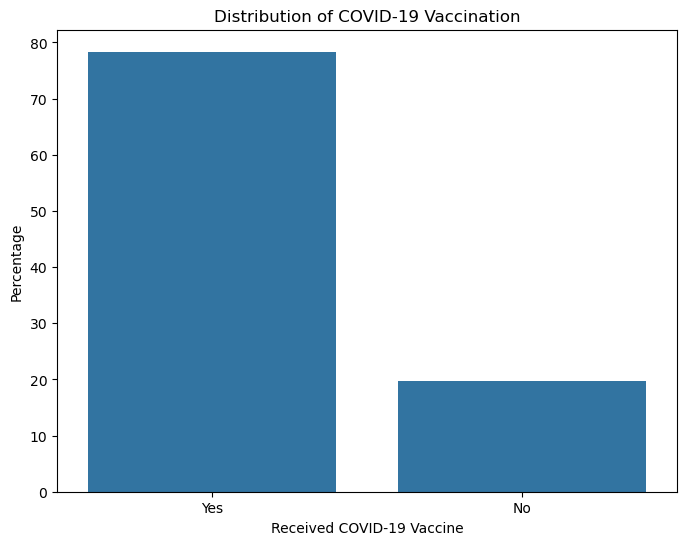

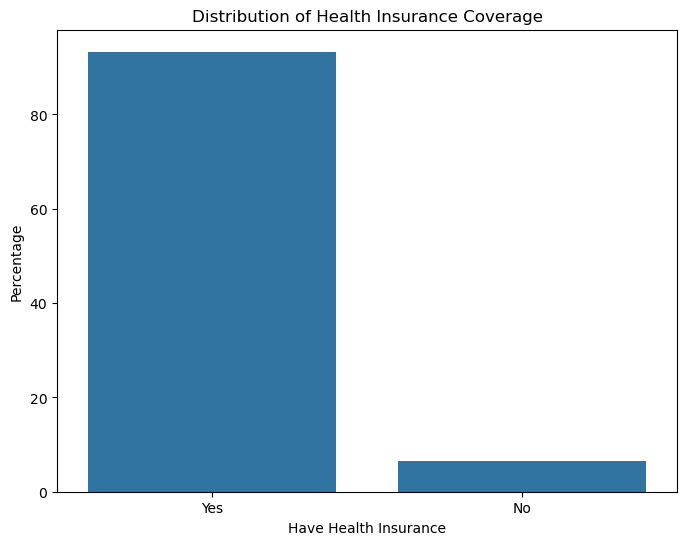

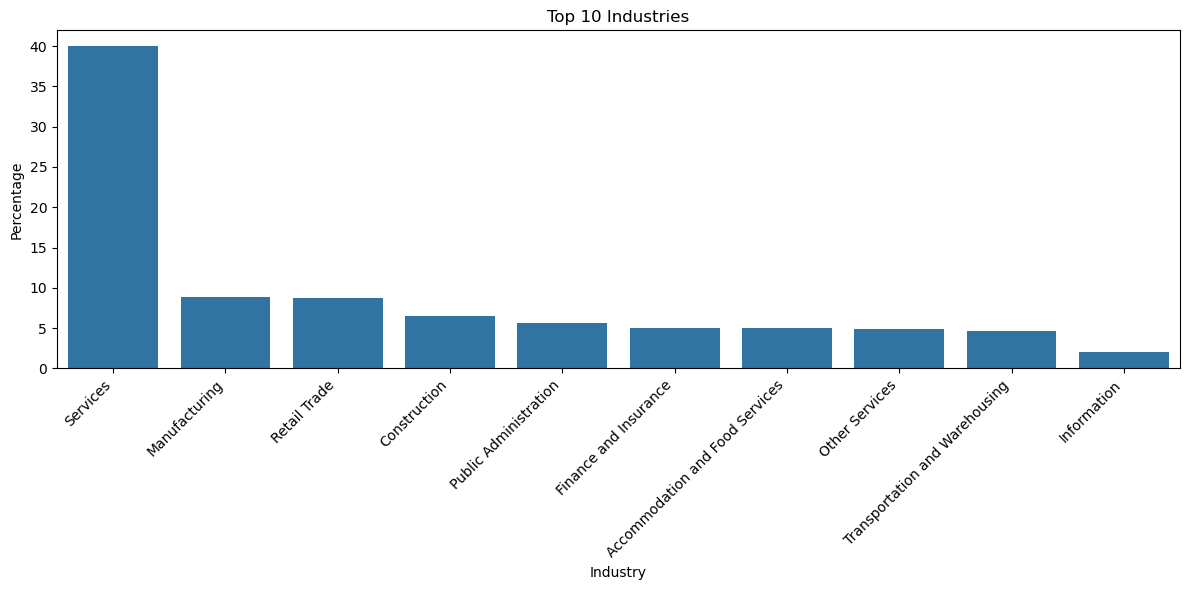

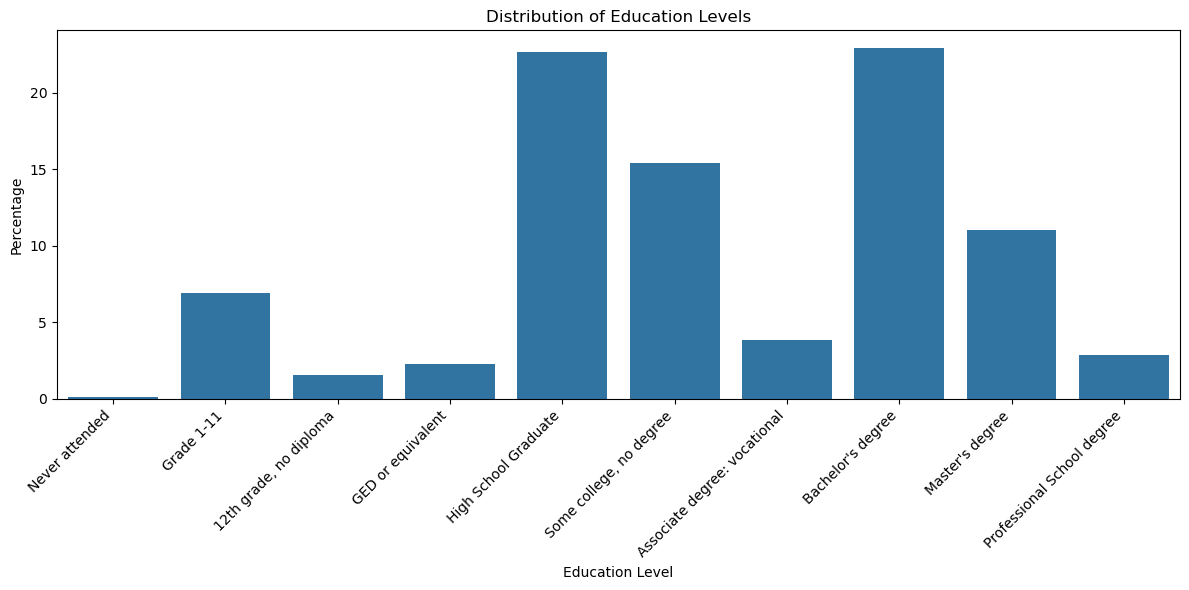

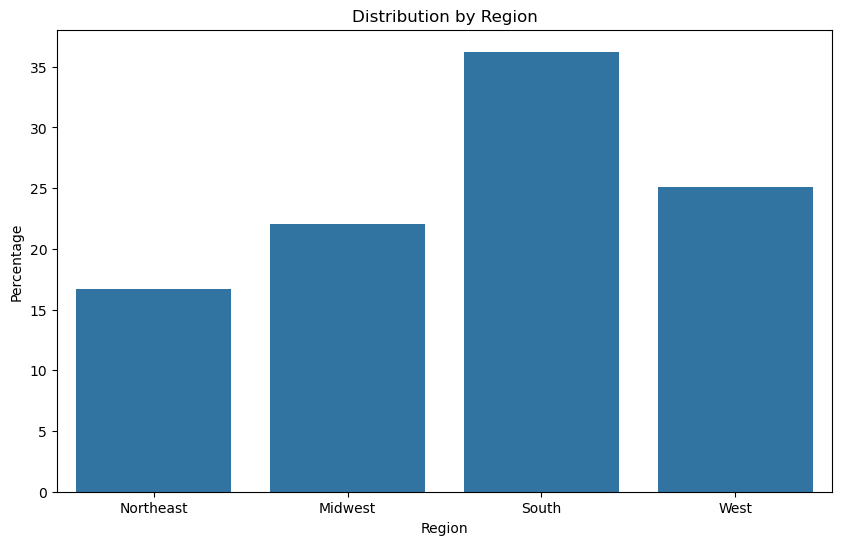

Trends Over Time:


,SRVY_YR,avg_age,percent_insured
0,2019,52.120136,92.680564
1,2020,53.605265,93.601115
2,2021,52.626959,93.216200
3,2022,53.050920,93.280532
4,2023,53.267868,93.767360


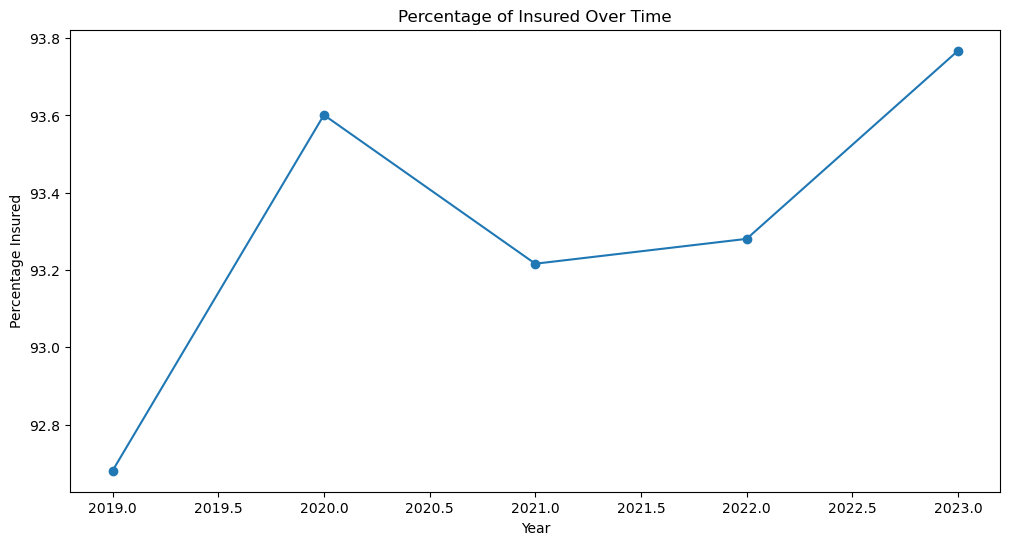

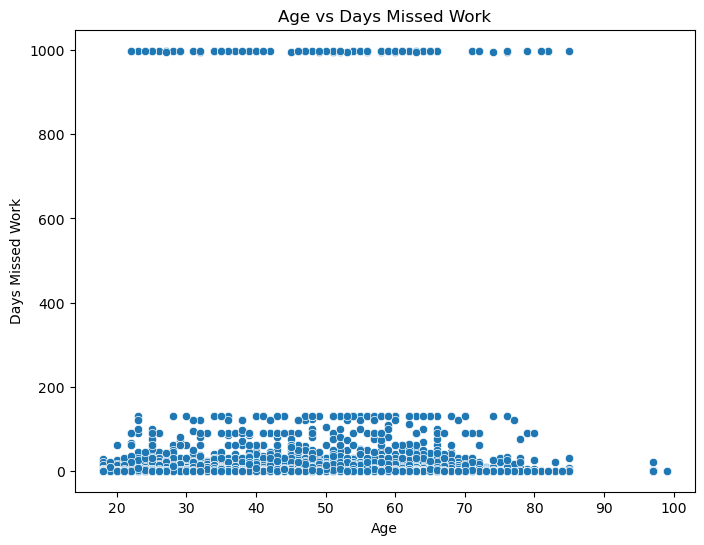

Correlation coefficient: 0.03831986487168198
Statistics by Region:


,REGION,avg_age,avg_days_missed,percent_insured
0,1,53.918039,20.164938,96.215633
1,2,53.310710,12.383864,94.723330
2,3,52.989916,13.578828,90.503306
3,4,51.846180,13.333151,94.167021


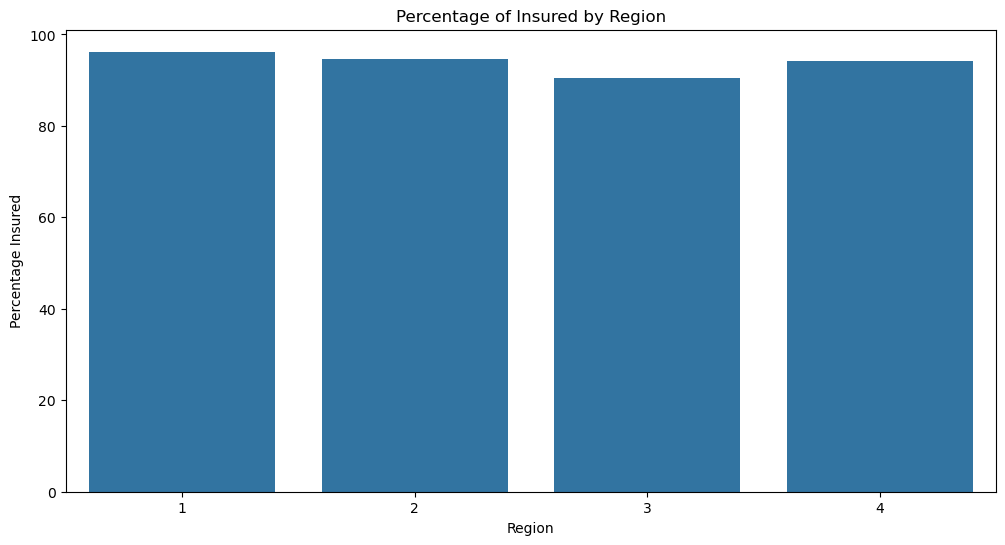

File copied to s3://usd-team1-ads508/industry_code_mapping/industry_code_mapping.csv
Create Table Statement:

CREATE EXTERNAL TABLE IF NOT EXISTS db_508.industry_code_mapping (
    EMDINDSTN1_A INT,
    industry_year_code BIGINT
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
LOCATION 's3://[REDACTED_BUCKET]/industry_code_mapping/'
TBLPROPERTIES ('skip.header.line.count'='1')


Tables in the database:
                      tab_name
0       county_health_rankings
1        industry_code_mapping
2            industry_year_avg
3                 nhis_dataset
4  nhis_dataset_with_estimates
5   nhis_with_regional_metrics

Table 'industry_code_mapping' creation successful: True

Sample data from the table:


,emdindstn1_a,industry_year_code
0,0,0
1,1,110000
2,2,110000
3,3,110000
4,4,110000
5,5,110000
6,6,210000
7,7,210000
8,8,210000
9,9,220000


File copied to s3://usd-team1-ads508/industry_year_avg/industry_year_avg.csv
Create Table Statement:

CREATE EXTERNAL TABLE IF NOT EXISTS db_508.industry_year_avg (
    Year INT,
    Industry STRING,
    Industry_code BIGINT,
    Avg_Estimate DOUBLE
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
LOCATION 's3://[REDACTED_BUCKET]/industry_year_avg/'
TBLPROPERTIES ('skip.header.line.count'='1')


Tables in the database:
                      tab_name
0       county_health_rankings
1        industry_code_mapping
2            industry_year_avg
3                 nhis_dataset
4  nhis_dataset_with_estimates
5   nhis_with_regional_metrics

Table 'industry_year_avg' creation successful: True

Sample data from the table:


,year,industry,industry_code,avg_estimate
0,2022,Accommodation and food services,720000.0,35.615385
1,2022,Administrative and support and waste managemen...,560000.0,65.000000
2,2022,All industries,0.0,56.784519
3,2022,Construction,230000.0,42.250000
4,2022,Credit intermediation,522000.0,34.307692
5,2022,Education and health services,600000.0,62.694444
6,2022,Educational services,610000.0,68.151515
7,2022,Elementary and secondary schools,611100.0,77.571429
8,2022,Finance and insurance,520000.0,40.923077
9,2022,Financial activities,NaN,33.230769


File copied to s3://usd-team1-ads508/county_health_rankings/county_health_rankings.csv
Create Table Statement:

CREATE EXTERNAL TABLE IF NOT EXISTS db_508.county_health_rankings (
    year INT,
    state STRING,
    county STRING,
    premature_death DOUBLE,
    poor_fair_health DOUBLE,
    adult_smoking DOUBLE,
    obesity_rate DOUBLE,
    physical_inactivity DOUBLE,
    access_exercise DOUBLE,
    flu_vaccination_rate DOUBLE,
    mammography_screening DOUBLE,
    uninsured_rate DOUBLE,
    driving_alone_to_work DOUBLE,
    long_commute DOUBLE,
    severe_housing_problems DOUBLE,
    air_pollution_pmatter DOUBLE,
    drinking_water_violations DOUBLE,
    children_in_poverty DOUBLE,
    income_inequality DOUBLE,
    social_associations DOUBLE,
    homeownership DOUBLE,
    median_household_income DOUBLE,
    population INT
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
LOCATION 's3://[REDACTED_BUCKET]/county_health_rankings/'
TBLPROPERTIES ('skip.header.line.c

,year,state,county,premature_death,poor_fair_health,adult_smoking,obesity_rate,physical_inactivity,access_exercise,flu_vaccination_rate,...,long_commute,severe_housing_problems,air_pollution_pmatter,drinking_water_violations,children_in_poverty,income_inequality,social_associations,homeownership,median_household_income,population
0,2019,US,United States,6900.630354,0.184043,0.193747,0.285,0.222,0.838945,0.426497,...,0.352,0.183731,8.237422,0.365979,0.184,4.941486,9.300353,0.638187,60336.0,325719178
1,2019,AL,Alabama,9917.232898,0.214024,0.215382,0.351,0.282,0.616496,0.420000,...,0.337,0.149122,11.000000,0.074627,0.244,5.238579,12.242716,0.685744,48193.0,4874747
2,2019,AL,Autauga County,8824.057123,0.184111,0.191247,0.375,0.311,0.686775,0.410000,...,0.383,0.149546,11.700000,0.000000,0.193,4.636664,12.631731,0.732877,58343.0,55504
3,2019,AL,Baldwin County,7224.632160,0.180605,0.167955,0.310,0.238,0.719710,0.450000,...,0.405,0.138317,10.300000,1.000000,0.147,4.518560,10.692213,0.728593,56607.0,212628
4,2019,AL,Barbour County,9586.165037,0.257734,0.215409,0.443,0.282,0.536257,0.370000,...,0.338,0.154555,11.500000,0.000000,0.503,5.755063,8.472944,0.625068,32490.0,25270
5,2019,AL,Bibb County,11783.543675,0.199969,0.199164,0.378,0.349,0.162514,0.390000,...,0.486,0.109609,11.200000,0.000000,0.273,4.254594,10.157665,0.753615,45795.0,22668
6,2019,AL,Blount County,10908.101822,0.210953,0.196522,0.344,0.285,0.229493,0.380000,...,0.597,0.104012,11.700000,0.000000,0.185,4.126883,9.011507,0.785210,48253.0,58013
7,2019,AL,Bullock County,12066.910263,0.294077,0.234783,0.394,0.292,0.266905,0.260000,...,0.473,0.207598,11.200000,0.000000,0.483,6.599523,9.650647,0.700272,29113.0,10309
8,2019,AL,Butler County,14018.606262,0.265026,0.221977,0.402,0.347,0.485797,0.350000,...,0.318,0.137803,10.600000,0.000000,0.330,5.122786,11.501150,0.700709,36842.0,19825
9,2019,AL,Calhoun County,12217.759984,0.195847,0.204622,0.371,0.302,0.447138,0.380000,...,0.306,0.145388,11.800000,0.000000,0.242,4.983814,14.309272,0.693918,45937.0,114728



Total records in county_health_rankings: 15970

Basic statistics by year:


,year,county_count,avg_uninsured_rate,avg_obesity_rate,avg_flu_vaccination_rate,total_population
0,2019,3194,0.111080,0.320273,0.405570,977157534
1,2020,3194,0.114449,0.328081,0.418161,981502302
2,2021,3194,0.114679,0.334022,0.431489,984718569
3,2022,3194,0.119115,0.356662,0.430004,988452369
4,2023,3194,0.118120,0.361415,0.447263,995681235


Removing existing S3 path if it exists...
Creating new table with industry average estimates:

CREATE TABLE db_508.nhis_dataset_with_estimates
WITH (
    format = 'PARQUET',
    external_location = 's3://[REDACTED_BUCKET]/nhis_with_estimates_[TIMESTAMP]',
    partitioned_by = ARRAY['SRVY_YR']
) AS
SELECT 
    n.EVERCOVD_A,
    n.SHTCVD191_A,
    n.EMPDYSMSS3_A,
    n.HICOV_A,
    n.EMDINDSTN1_A,
    n.SEX_A,
    n.AGEP_A,
    n.EDUCP_A,
    n.REGION,
    i.Avg_Estimate,
    n.SRVY_YR  -- Partition column must be the last column
FROM 
    db_508.nhis_dataset n
LEFT JOIN 
    db_508.industry_code_mapping m ON n.EMDINDSTN1_A = m.EMDINDSTN1_A
LEFT JOIN 
    db_508.industry_year_avg i ON 
        m.industry_year_code = i.Industry_code AND 
        n.SRVY_YR = i.Year

New table created successfully!

Tables in the database:
                      tab_name
0       county_health_rankings
1        industry_code_mapping
2            industry_year_avg
3                 nhis_dataset
4  nhis_dataset

,evercovd_a,shtcvd191_a,empdysmss3_a,hicov_a,emdindstn1_a,sex_a,agep_a,educp_a,region,avg_estimate,srvy_yr
0,2.0,None,1,1,78,1,39,5,3,68.227273,2020
1,2.0,None,0,1,78,1,42,4,3,68.227273,2020
2,NaN,None,0,1,64,1,32,8,3,67.647059,2020
3,NaN,None,0,1,68,2,32,8,3,77.333333,2020
4,2.0,None,1,1,54,2,60,5,3,41.000000,2020
5,NaN,None,1,1,12,1,62,4,3,81.000000,2020
6,2.0,None,30,1,29,1,56,7,3,81.000000,2020
7,2.0,None,14,2,67,2,33,4,3,77.333333,2020
8,NaN,None,0,1,10,1,32,5,3,40.500000,2020
9,NaN,None,0,1,64,2,42,8,3,67.647059,2020



Statistics on industry average estimates:


,total_records,records_with_estimates,records_without_estimates,percent_with_estimates
0,150220,49118,101102,32.697377



Estimate coverage by year:


,year,total_records,records_with_estimates,percent_with_estimates
0,2019,31997,0,0.000000
1,2020,31568,17356,54.979726
2,2021,29482,16016,54.324673
3,2022,27651,0,0.000000
4,2023,29522,15746,53.336495


Removing existing S3 path if it exists...
Creating new table with regional health metrics:

CREATE TABLE db_508.nhis_with_regional_metrics
WITH (
    format = 'PARQUET',
    external_location = 's3://[REDACTED_BUCKET]/nhis_with_regional_metrics_[TIMESTAMP]',
    partitioned_by = ARRAY['SRVY_YR']
) AS
SELECT 
    n.EVERCOVD_A,
    n.SHTCVD191_A,
    n.EMPDYSMSS3_A,
    n.HICOV_A,
    n.EMDINDSTN1_A,
    n.SEX_A,
    n.AGEP_A,
    n.EDUCP_A,
    n.REGION,
    n.Avg_Estimate as industry_avg_estimate,
    r.avg_uninsured_rate,
    r.avg_obesity_rate,
    r.avg_poor_fair_health,
    r.avg_flu_vaccination_rate,
    r.avg_adult_smoking,
    r.avg_physical_inactivity,
    r.avg_median_household_income,
    n.SRVY_YR  -- Partition column must be the last column
FROM 
    db_508.nhis_dataset_with_estimates n
JOIN (
    -- Aggregate county metrics to region level
    SELECT 
        m.REGION,
        chr.year,
        AVG(chr.uninsured_rate) as avg_uninsured_rate,
        AVG(chr.obesity_rate) as

,evercovd_a,shtcvd191_a,empdysmss3_a,hicov_a,emdindstn1_a,sex_a,agep_a,educp_a,region,industry_avg_estimate,avg_uninsured_rate,avg_obesity_rate,avg_poor_fair_health,avg_flu_vaccination_rate,avg_adult_smoking,avg_physical_inactivity,avg_median_household_income,srvy_yr
0,1,None,9.0,1,44.0,1,50,1,3,37.153846,0.140534,0.348728,0.232622,0.430643,0.22575,0.290361,51615.138985,2021
1,1,None,18.0,1,67.0,1,53,7,3,94.733333,0.140534,0.348728,0.232622,0.430643,0.22575,0.290361,51615.138985,2021
2,1,None,21.0,1,47.0,1,56,8,3,46.000000,0.140534,0.348728,0.232622,0.430643,0.22575,0.290361,51615.138985,2021
3,2,None,NaN,1,NaN,2,57,5,3,NaN,0.140534,0.348728,0.232622,0.430643,0.22575,0.290361,51615.138985,2021
4,2,None,NaN,1,NaN,1,25,4,3,NaN,0.140534,0.348728,0.232622,0.430643,0.22575,0.290361,51615.138985,2021
5,2,None,NaN,1,NaN,1,55,5,3,NaN,0.140534,0.348728,0.232622,0.430643,0.22575,0.290361,51615.138985,2021
6,1,None,5.0,1,97.0,1,45,9,3,56.598214,0.140534,0.348728,0.232622,0.430643,0.22575,0.290361,51615.138985,2021
7,1,None,14.0,1,10.0,1,41,5,3,69.000000,0.140534,0.348728,0.232622,0.430643,0.22575,0.290361,51615.138985,2021
8,2,None,1.0,1,54.0,2,26,4,3,40.000000,0.140534,0.348728,0.232622,0.430643,0.22575,0.290361,51615.138985,2021
9,2,None,NaN,1,NaN,2,71,9,3,NaN,0.140534,0.348728,0.232622,0.430643,0.22575,0.290361,51615.138985,2021



Regional health metrics summary:


,REGION,total_records,avg_uninsured_rate,avg_obesity_rate,avg_flu_vaccination_rate
0,1,25024,0.066650,0.304463,0.495512
1,2,33108,0.091690,0.345042,0.432692
2,3,54440,0.140691,0.355813,0.423717
3,4,37648,0.114975,0.292844,0.383389


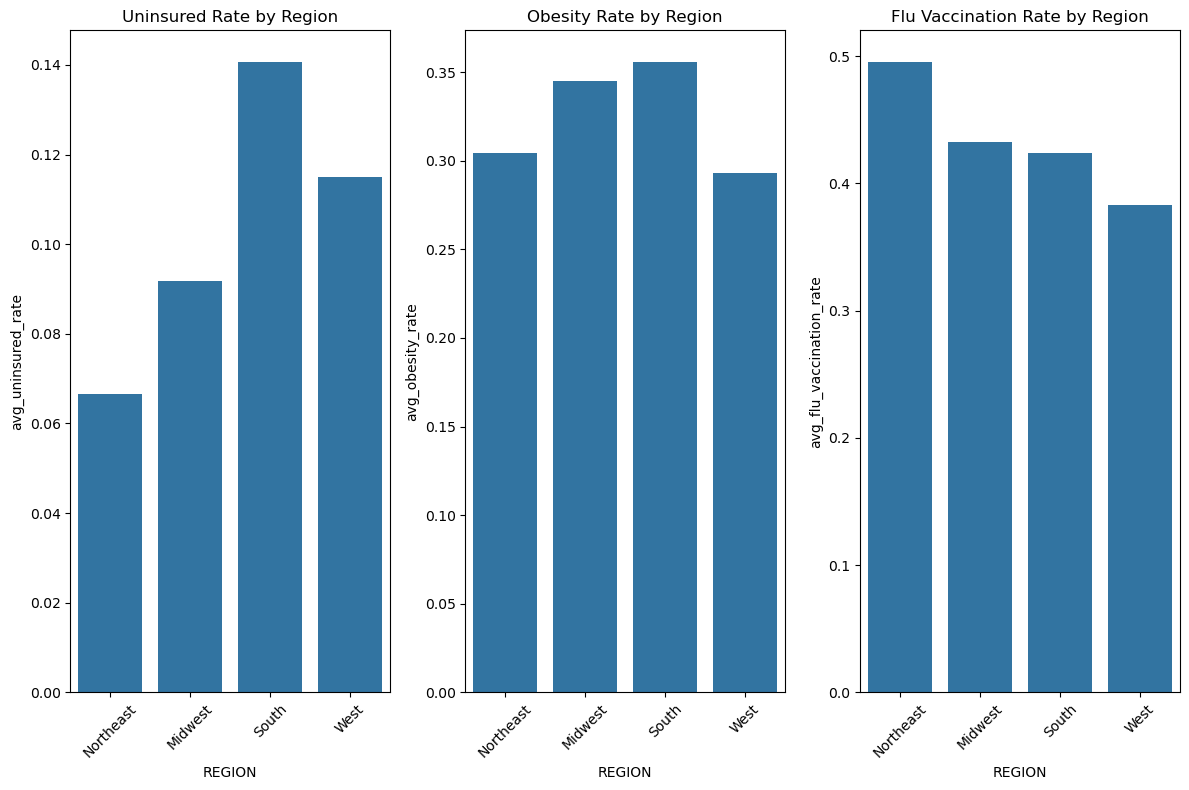

Loaded 150220 rows of data for export
CSV file successfully saved to s3://usd-team1-ads508/nhis_with_regional_metrics.csv
2025-04-11 19:50:43   25224351 nhis_with_regional_metrics.csv


In [3]:
print(" * Running Data Processing and Analysis")
%run ./01_data_processing_and_analysis_pipeline.ipynb

### Step 2: Feature Engineering

In [5]:
print("* Data preparation... ")
%run ./02_data_preparation.ipynb 


* Data preparation... 
SageMaker Session: <sagemaker.session.Session object at 0x7f9737070110>
Bucket: usd-team1-ads508
Region: us-east-1
Shape: (150220, 18)

First few rows:

Original column information:
- evercovd_a: float64
- shtcvd191_a: float64
- empdysmss3_a: float64
- hicov_a: int64
- emdindstn1_a: float64
- sex_a: int64
- agep_a: int64
- educp_a: int64
- region: int64
- industry_avg_estimate: float64
- avg_uninsured_rate: float64
- avg_obesity_rate: float64
- avg_poor_fair_health: float64
- avg_flu_vaccination_rate: float64
- avg_adult_smoking: float64
- avg_physical_inactivity: float64
- avg_median_household_income: float64
- srvy_yr: int64

Missing values per column:
evercovd_a                      45853
shtcvd191_a                     71089
empdysmss3_a                    57656
hicov_a                             0
emdindstn1_a                    94783
sex_a                               0
agep_a                              0
educp_a                             0
region    

<IPython.core.display.Javascript object>

### Step 3: Modeling and Evaluation

* Modeling...
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
SageMaker Session: <sagemaker.session.Session object at 0x7f0b68847090>
Bucket: usd-team1-ads508
Region: us-east-1
Found processed data at s3://usd-team1-ads508/processed-health-data-20250331-083045.csv
Loaded data with shape: (150220, 36)
Processed data shape: (150220, 45)
Created 9 new features: ['age_group', 'age_18-29', 'age_30-44', 'age_45-59', 'age_60-74', 'age_75+', 'avg_obesity_rate_z', 'avg_adult_smoking_z', 'avg_physical_inactivity_z']

Target variable statistics (days missed from work):
count    150220.000000
mean          4.123432
std          39.234630
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         998.000000
Name: empdysmss3_a, dtype: float64


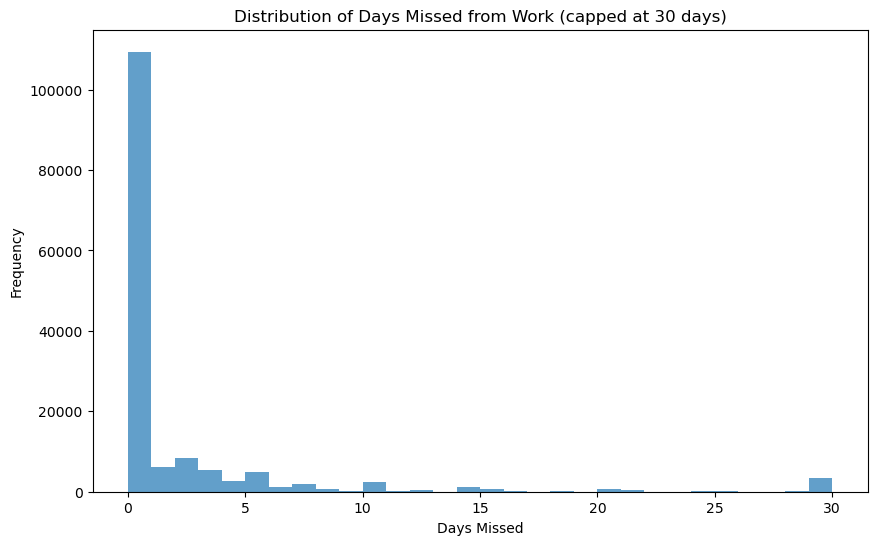

Training set: 105154 samples
Validation set: 22533 samples
Test set: 22533 samples


INFO:sagemaker:Creating training-job with name: health-policy-xgboost-20250411-195502


Training data saved to: s3://usd-team1-ads508/health-policy-optimization/processed_data/20250411-195502/train/health_data_train.csv
Validation data saved to: s3://usd-team1-ads508/health-policy-optimization/processed_data/20250411-195502/validation/health_data_validation.csv
Test data saved to: s3://usd-team1-ads508/health-policy-optimization/processed_data/20250411-195502/test/health_data_test.csv
Model output location: s3://usd-team1-ads508/health-policy-optimization/model_output/20250411-195502
Starting training job: health-policy-xgboost-20250411-195502

2025-04-11 19:55:09 Starting - Starting the training job..
2025-04-11 19:55:23 Starting - Preparing the instances for training...
2025-04-11 19:55:46 Downloading - Downloading input data..........
2025-04-11 19:56:37 Downloading - Downloading the training image..........
2025-04-11 19:57:32 Training - Training image download completed. Training in progress...
2025-04-11 19:57:48 Uploading - Uploading generated training model..
2025

INFO:botocore.httpchecksum:Skipping checksum validation. Response did not contain one of the following algorithms: ['crc32', 'sha1', 'sha256'].



Training job health-policy-xgboost-20250411-195502 completed successfully!
Model artifact S3 path:  s3://usd-team1-ads508/health-policy-optimization/model_output/20250411-195502/health-policy-xgboost-20250411-195502/output/model.tar.gz
Model loaded successfully
['xgboost-model']
RMSE: 40.30
R2 Score: -0.010


INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-04-11-19-58-08-027


Error deploying model: An error occurred (AccessDeniedException) when calling the CreateModel operation

Training a local XGBoost model to analyze feature importance...
Feature columns for local XGBoost model: ['ind_accommodation_food', 'ind_agriculture', 'ind_construction', 'ind_finance', 'ind_information', 'ind_manufacturing', 'ind_military', 'ind_mining', 'ind_other', 'ind_other_services', 'ind_public_admin', 'ind_real_estate', 'ind_retail', 'ind_services', 'ind_transportation', 'ind_wholesale', 'region_1', 'region_2', 'region_3', 'region_4', 'age_insurance_interaction', 'age_18-29', 'age_30-44', 'age_45-59', 'age_60-74', 'age_75+', 'agep_a', 'avg_uninsured_rate', 'avg_obesity_rate', 'avg_flu_vaccination_rate', 'avg_adult_smoking', 'avg_physical_inactivity', 'avg_median_household_income', 'health_risk_score']
[0]	train-rmse:38.12790	eval-rmse:41.10039
[10]	train-rmse:36.70211	eval-rmse:40.88050
[12]	train-rmse:36.65422	eval-rmse:40.85277

Feature Importance Analysis:
               

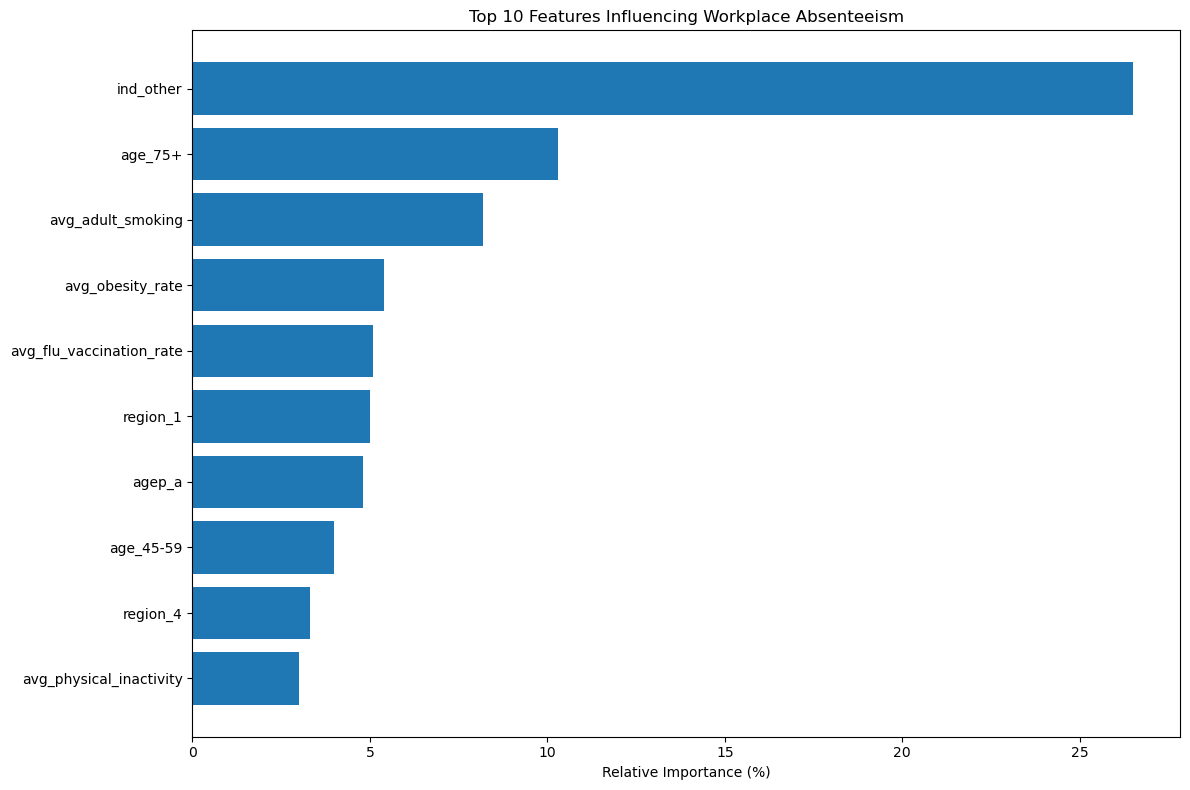

In [1]:
print("* Modeling...")
%run ./03_modeling.ipynb